In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


ModuleNotFoundError: No module named 'seaborn'

In [31]:
df=pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [33]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [35]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [60]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [61]:
print(x.shape)
print(y.shape)

(10000, 5)
(10000,)


In [71]:

#for  dataframe visualization
# num_features = x.shape[1]
# fig, axes = plt.subplots(1, num_features, figsize=(5*num_features, 4))

# for i, col in enumerate(x.columns):
#     axes[i].scatter(x[col], y, alpha=0.3)
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Target (y)')
#     axes[i].set_title(f'{col} vs y')

# plt.tight_layout()
# plt.show()


In [63]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)


(8000, 5)
(8000,)


In [64]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [65]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
y_pred= model.predict(x_test)
y_pred

array([50.45128503, 53.09379171, 78.24502652, ..., 64.56863194,
       25.89718776, 18.82598463], shape=(2000,))

In [67]:
error= y_pred-y_test
error

array([-2.54871497,  3.09379171, -1.75497348, ..., -1.43136806,
       -1.10281224, -2.17401537], shape=(2000,))

In [68]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.9880686410711422

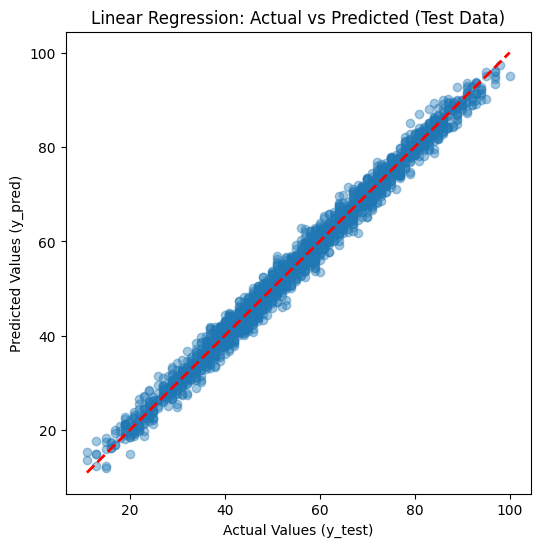

In [69]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Linear Regression: Actual vs Predicted (Test Data)")
plt.show()